In [6]:
import pandas as pd

df = pd.read_csv(r'/Users/G/Desktop/Documents/Formazione in Data Science/Mentorship program DVS/Data/averaged.csv')
df['date'] =  pd.to_datetime(df['date']) #convert "date" to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335800 entries, 0 to 335799
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    335800 non-null  datetime64[ns]
 1   T       335800 non-null  float64       
 2   Q       335800 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 7.7 MB


### Preliminary plots

<AxesSubplot:title={'center':'T'}>

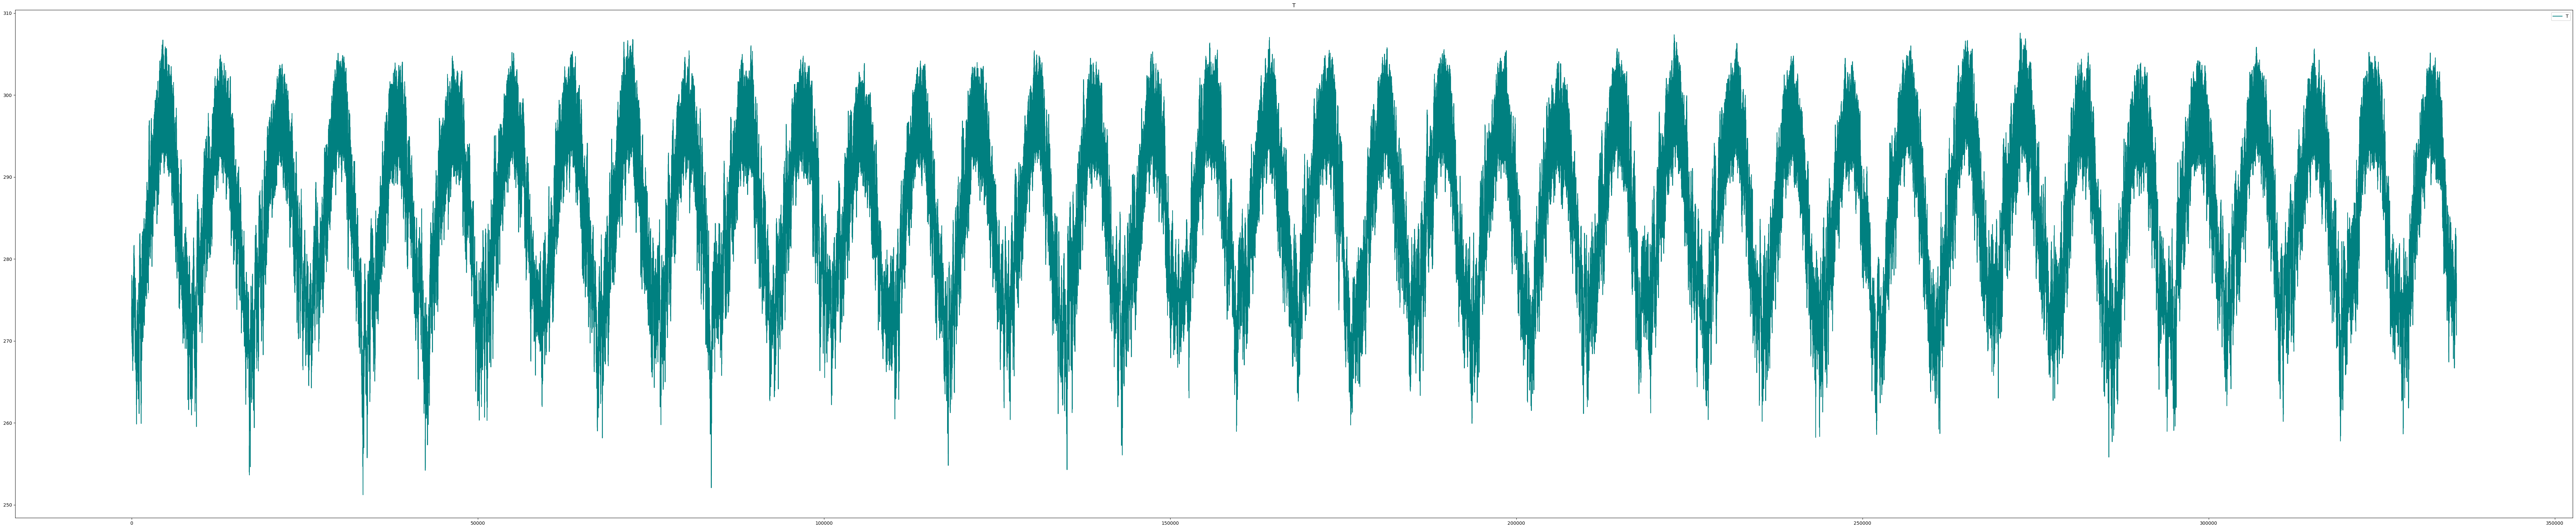

In [5]:
df[["T"]].plot.line(figsize=(100,20), color="teal",title="T")

<AxesSubplot:title={'center':'T'}>

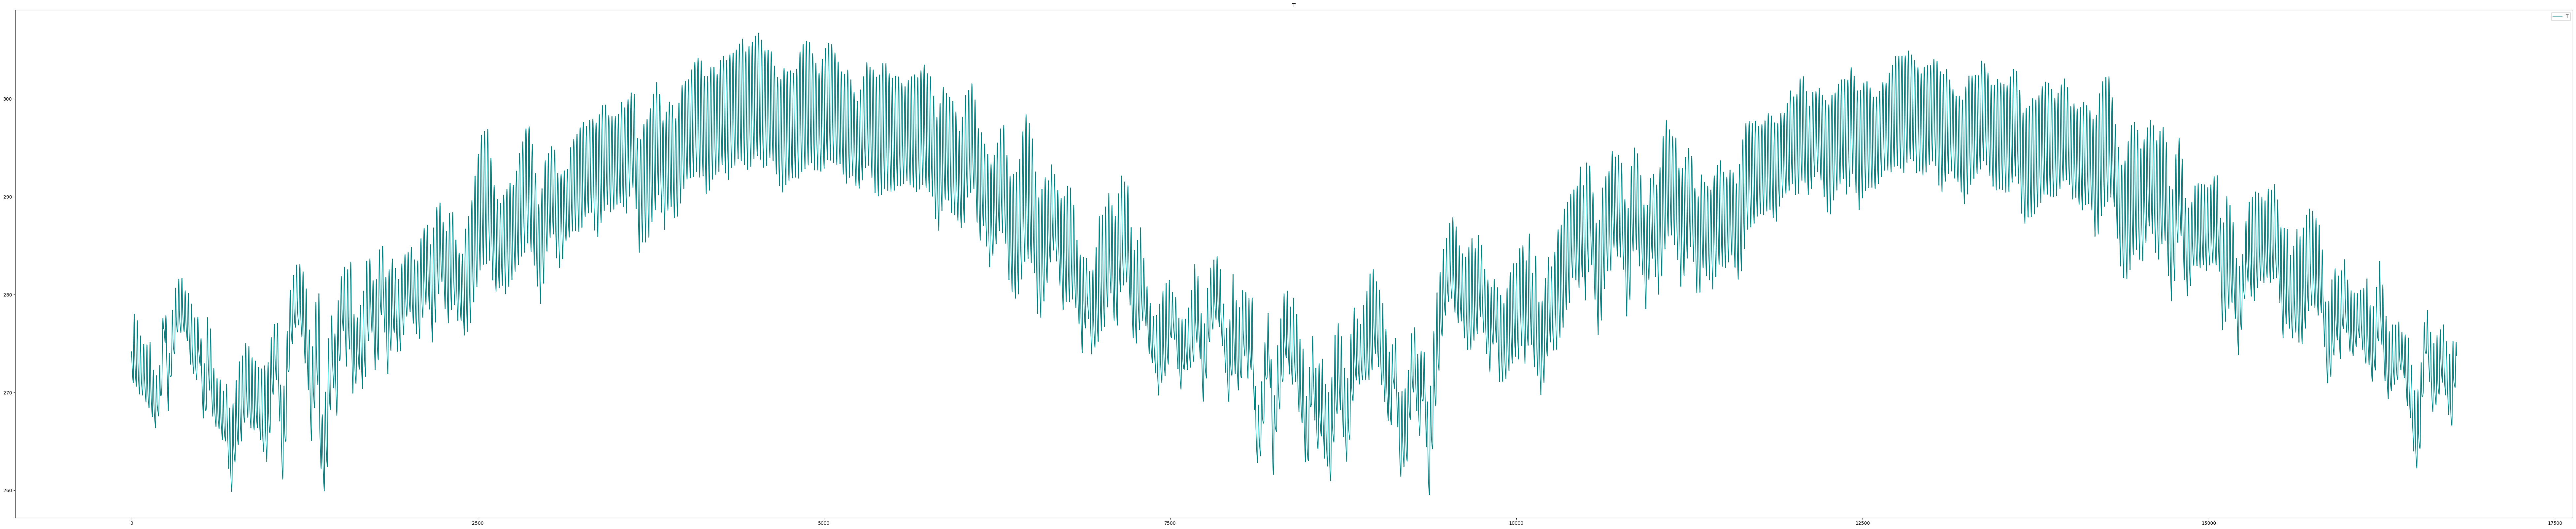

In [6]:
df2 = df.loc[df["date"]<'1982-01-01 01:00:00',]
df2[["T"]].plot.line(figsize=(100,20), color="teal",title="T")

<Axes: title={'center': 'T'}, xlabel='date'>

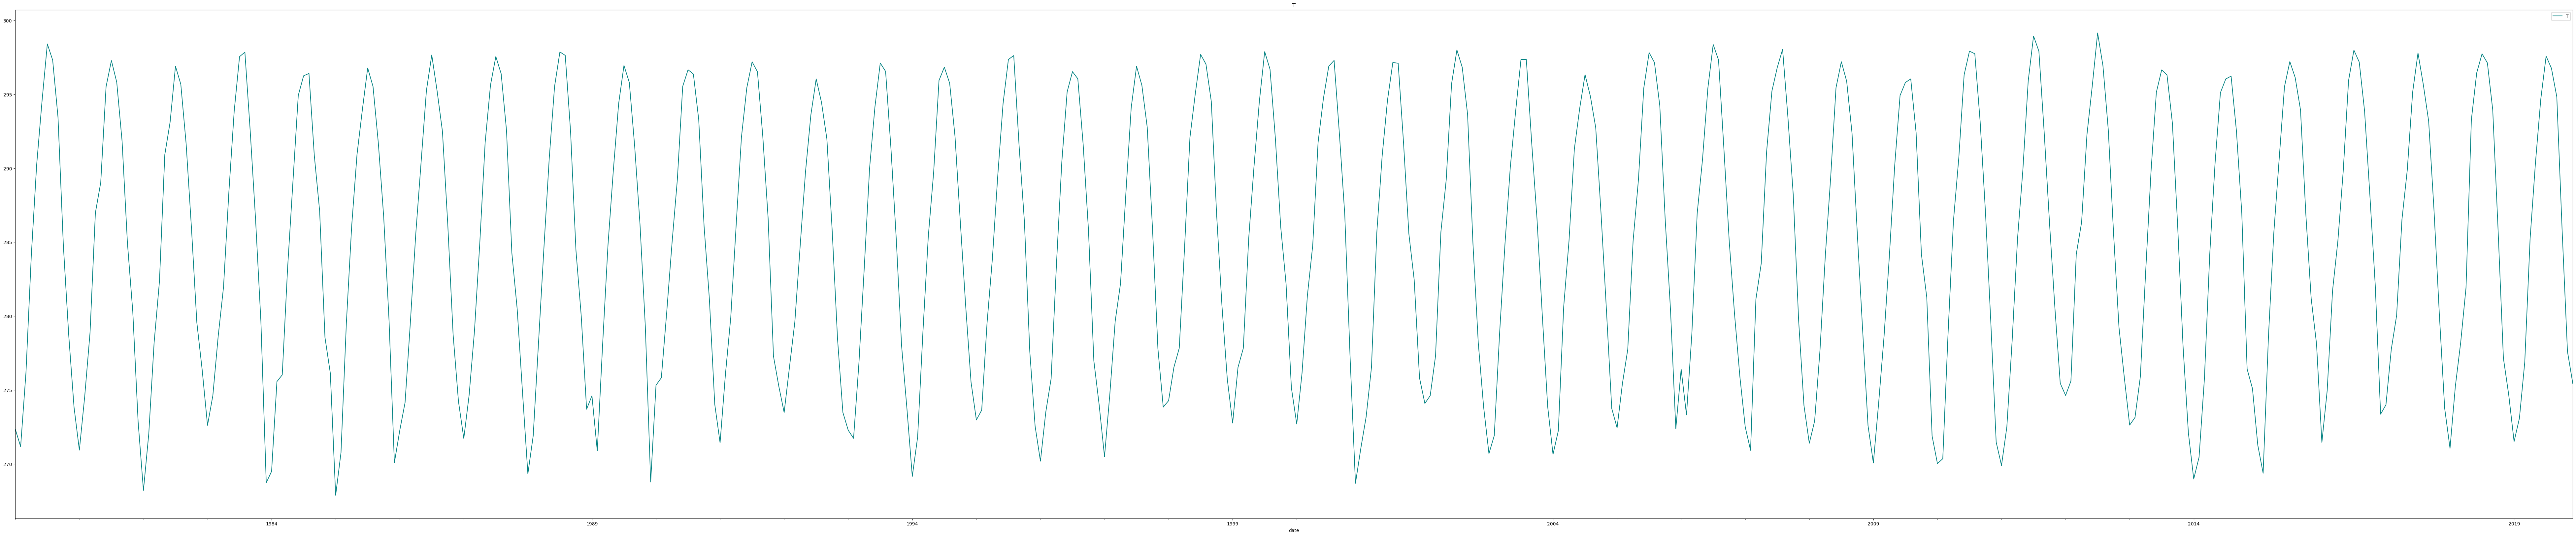

In [7]:
df = df.set_index("date") # set the colimns "date" as the index of the DataFrame
df_resampled = df[["T"]].resample("M").mean() # "Reduce the data frequency to one observation per hour, calculating the average of the values for each hour

df_resampled.plot.line(figsize=(100, 20), color="teal", title="T")


### Seasonal decompose

Our goal is to extract the trendline (which should be a line without any sign of periodical change) from the original graph (which is only periods and nothing else) and look at the residuals. The residuals of the original time series should be just a chaotic accumulation of points.

To do this we use the `statsmodels.api` module of Python, in particular of the function `seasonal_decompose()`.

In the **decomposition** of a time series **into trend, seasonality**, and **residuals**, seasonality refers to patterns of behavior that cyclically repeat over a known period of time. For example, a store's sales might show an increase every year during the holiday season, or summer temperatures might exhibit a seasonal pattern every year.

The `period` parameter specifies the length of this seasonal cycle. For instance, if the data represents daily average temperatures, and the seasonal period is annual, then `period=365`. If the seasonal period is monthly, then `period=12`.

The value of `period` is used by the `seasonal_decompose()` function to estimate the seasonal component of the time series. The function applies a moving average over windows of length `period` to estimate the seasonal component. The `period` parameter must be chosen appropriately to capture the seasonality present in the data. Choosing the wrong value for 'period' can lead to an inaccurate estimate of the seasonal component.

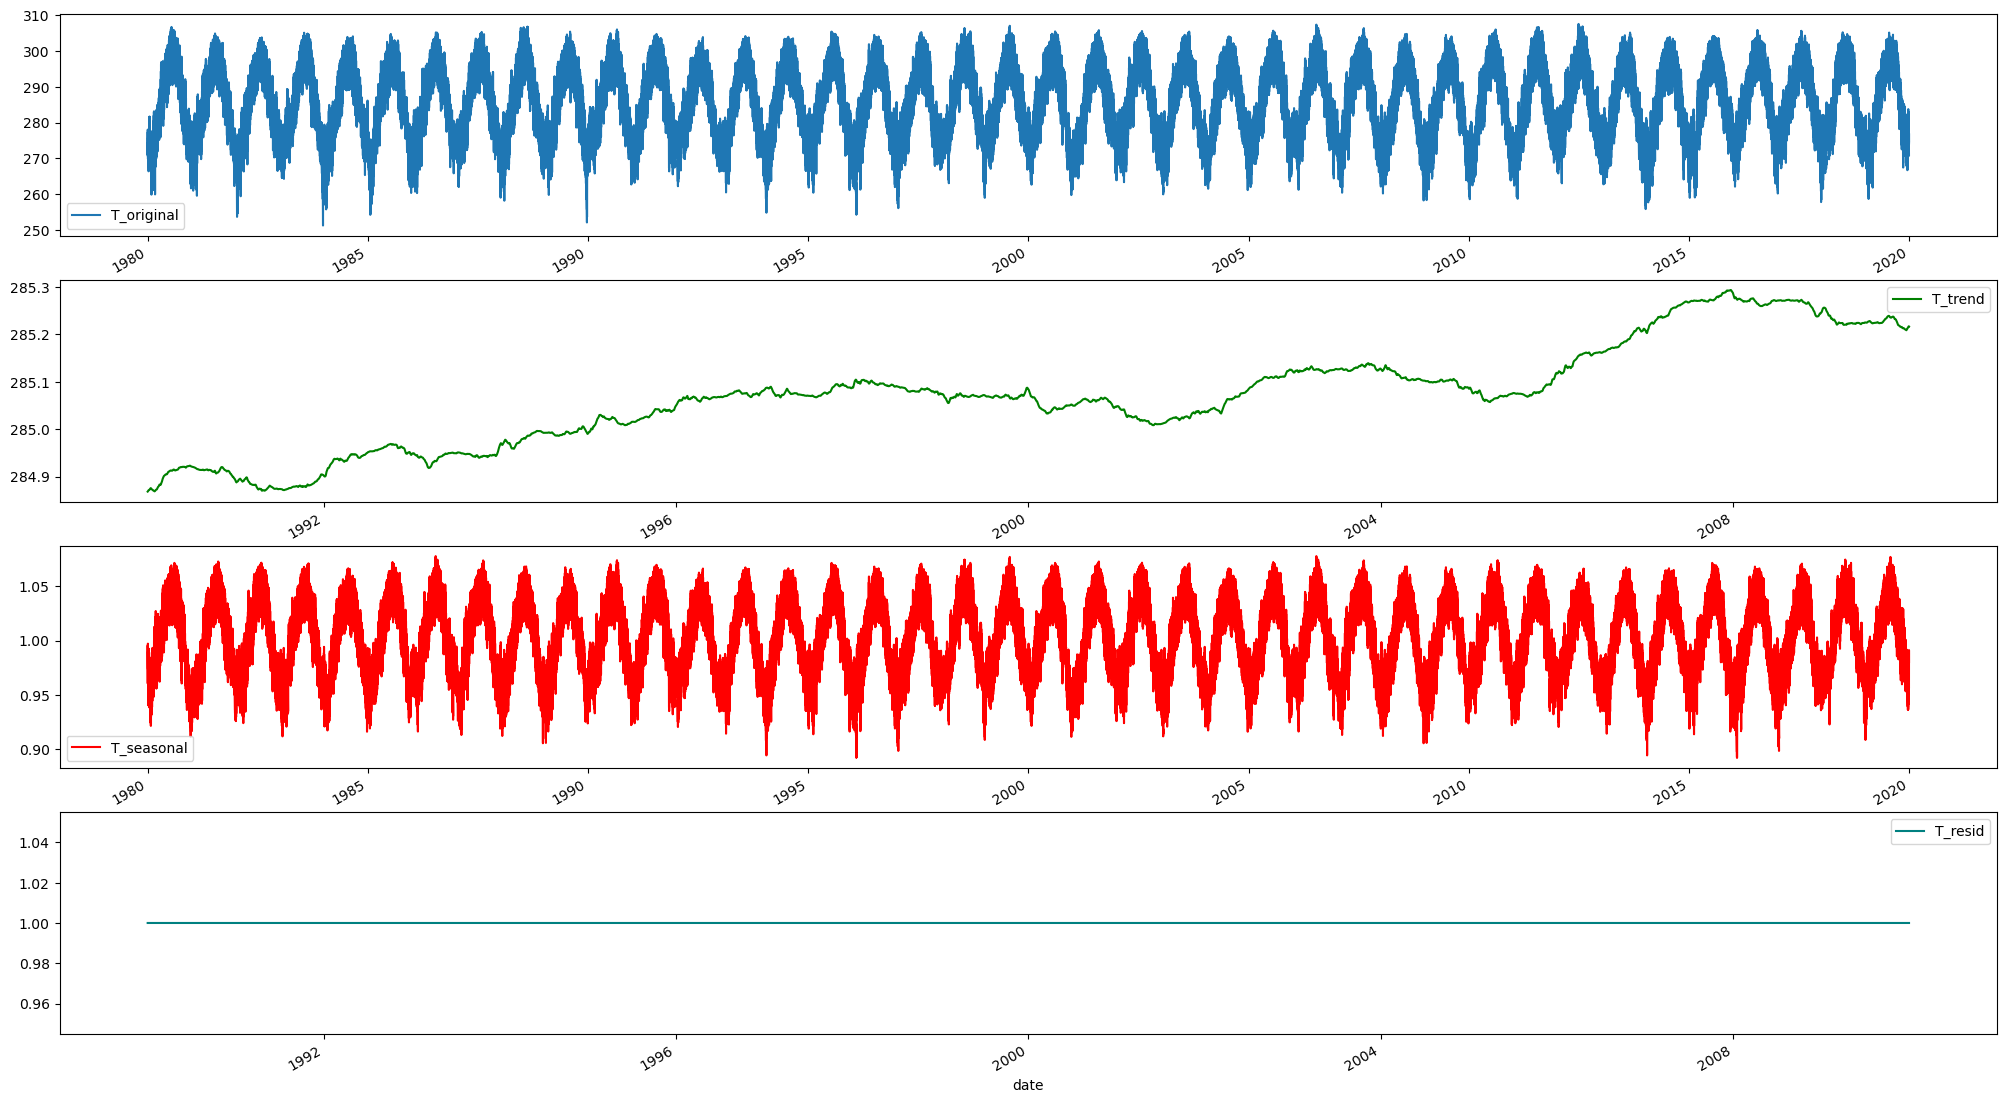

In [8]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

res = df.copy().dropna()
res = sm.tsa.seasonal_decompose(res['T'], model='multiplicative', period=167900)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(25,15))
res.observed.plot(ax=ax1, legend=True)
res.trend.plot(ax=ax2, legend=True, color='g')
res.seasonal.plot(ax=ax3, legend=True, color='r')
res.resid.plot(ax=ax4, color='teal')
ax1.legend(['T_original'])
ax2.legend(['T_trend'])
ax3.legend(['T_seasonal'])
ax4.legend(['T_resid'])

